In [1]:
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

In [2]:
overall = pd.read_csv('overall_results.csv')

print(overall.to_string(index=False))

 Epsilon  Accuracy Mean  Accuracy Std  AUC Mean  AUC Std
    0.01      82.019231      2.966952  0.933112 0.021721
    0.10      82.083333      2.758832  0.929922 0.029413
    1.00      84.134615      2.507386  0.938313 0.014338
   10.00      84.695513      2.144384  0.929498 0.015500
  100.00      86.057692      0.516811  0.912502 0.012799
 1000.00      86.009615      0.680099  0.919655 0.015466


In [3]:
overall = pd.read_csv('overall_results.csv')

# add row for normal training score
overall_normal = pd.read_csv('/home/localssk23/input_pixel_perturbation/results_normal/overall_results.csv')

# merge the two dataframes
overall = pd.concat([overall, overall_normal])

# change the last epsilon value to inf
overall['Epsilon'].iloc[-1] = 'inf'

print(overall.to_string(index=False))

Epsilon  Accuracy Mean  Accuracy Std  AUC Mean  AUC Std
   0.01      82.019231      2.966952  0.933112 0.021721
    0.1      82.083333      2.758832  0.929922 0.029413
    1.0      84.134615      2.507386  0.938313 0.014338
   10.0      84.695513      2.144384  0.929498 0.015500
  100.0      86.057692      0.516811  0.912502 0.012799
 1000.0      86.009615      0.680099  0.919655 0.015466
    inf      86.073718      0.618390  0.922711 0.015655


In [4]:
print(overall.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
Epsilon & Accuracy Mean & Accuracy Std & AUC Mean & AUC Std \\
\midrule
0.010000 & 82.019231 & 2.966952 & 0.933112 & 0.021721 \\
0.100000 & 82.083333 & 2.758832 & 0.929922 & 0.029413 \\
1.000000 & 84.134615 & 2.507386 & 0.938313 & 0.014338 \\
10.000000 & 84.695513 & 2.144384 & 0.929498 & 0.015500 \\
100.000000 & 86.057692 & 0.516811 & 0.912502 & 0.012799 \\
1000.000000 & 86.009615 & 0.680099 & 0.919655 & 0.015466 \\
inf & 86.073718 & 0.618390 & 0.922711 & 0.015655 \\
\bottomrule
\end{tabular}



In [5]:
classwise = pd.read_csv('classwise_results.csv')

print(classwise.to_string(index=False))

 Epsilon  Class  Accuracy Mean  Accuracy Std
    0.01      1      99.641026      0.205128
    0.01      0      52.649573      8.012792
    0.10      1      99.333333      0.598046
    0.10      0      53.333333      8.215360
    1.00      1      99.205128      0.404609
    1.00      0      59.017094      7.144425
   10.00      1      98.743590      1.210571
   10.00      0      61.282051      7.505325
  100.00      1      99.179487      0.191880
  100.00      0      64.188034      1.608110
 1000.00      1      99.025641      0.276162
 1000.00      0      64.316239      1.712071


In [6]:
classwise = pd.read_csv('classwise_results.csv')

classwise_normal = pd.read_csv('/home/localssk23/input_pixel_perturbation/results_normal/classwise_results.csv')

classwise = pd.concat([classwise, classwise_normal])

# change the last 2 epsilon values to inf
classwise['Epsilon'].iloc[-2] = 'inf'
classwise['Epsilon'].iloc[-1] = 'inf'

print(classwise.to_string(index=False))

Epsilon  Class  Accuracy Mean  Accuracy Std
   0.01      1      99.641026      0.205128
   0.01      0      52.649573      8.012792
    0.1      1      99.333333      0.598046
    0.1      0      53.333333      8.215360
    1.0      1      99.205128      0.404609
    1.0      0      59.017094      7.144425
   10.0      1      98.743590      1.210571
   10.0      0      61.282051      7.505325
  100.0      1      99.179487      0.191880
  100.0      0      64.188034      1.608110
 1000.0      1      99.025641      0.276162
 1000.0      0      64.316239      1.712071
    inf      1      99.435897      0.299023
    inf      0      63.803419      1.813598


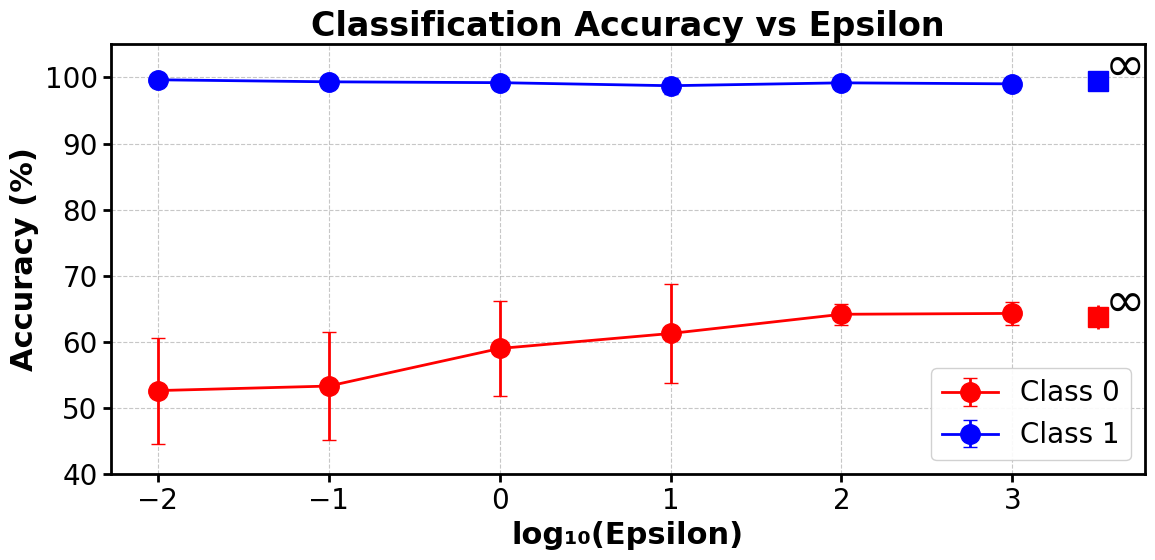

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

# Increase font sizes globally
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 24,
    'axes.labelsize': 22,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
})

# Create the plot
plt.figure(figsize=(12, 6))

# Plot for each class
for class_num in [0, 1]:
    class_data = classwise[classwise['Class'] == class_num]
    
    # Convert epsilon to numeric values where possible
    numeric_data = class_data[class_data['Epsilon'] != 'inf'].copy()
    numeric_data['Epsilon'] = pd.to_numeric(numeric_data['Epsilon'])
    
    # Handle infinity values separately
    inf_data = class_data[class_data['Epsilon'] == 'inf']
    
    # Plot numeric data with log scale
    plt.errorbar(np.log10(numeric_data['Epsilon']), 
                numeric_data['Accuracy Mean'],
                yerr=numeric_data['Accuracy Std'],
                marker='o',
                markersize=14,
                label=f'Class {class_num}',
                capsize=5,
                linewidth=2,
                color='red' if class_num == 0 else 'blue')
    
    # Add infinity points at the right end of the x-axis
    if not inf_data.empty:
        # Find the maximum x value to place infinity point
        max_x = np.log10(numeric_data['Epsilon'].max()) if not numeric_data.empty else 0
        # Place infinity point slightly to the right
        inf_x = max_x + 0.5
        
        plt.errorbar([inf_x], 
                    inf_data['Accuracy Mean'],
                    yerr=inf_data['Accuracy Std'],
                    marker='s',
                    markersize=14,
                    linestyle='none',
                    linewidth=2,
                    color='red' if class_num == 0 else 'blue')
        
        # Add annotation for infinity with larger font
        plt.annotate('∞', xy=(inf_x, inf_data['Accuracy Mean'].values[0]),
                    xytext=(5, 0), textcoords='offset points',
                    fontsize=35)  # Increased from 18 to 30

# Customize plot
plt.xlabel('log₁₀(Epsilon)', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Classification Accuracy vs Epsilon', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(frameon=True, framealpha=0.9)

# Set y-axis limits to show full range of data with some padding
plt.ylim(40, 105)

# Add vertical gridlines for better readability
plt.grid(True, which='both', linestyle='--', alpha=0.7)

# Make tick marks thicker and longer
plt.tick_params(width=2, length=6)

# Make plot borders thicker
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()